# Part 2 - House prices

Data cleaning
---
Your analysis should include the necessary data cleaning steps. For instance

- Find and handle incorrect, missing values
- Correct inconsistencies in the variables
- Handle outliers

You are free to choose your preferred approach to handle each step. For instance, you might want to replace missing values with the average or the most frequent value or create an missing category. In any case, justify your choices!

In [1460]:
# import libraries 
%matplotlib inline
import pandas as pd 
import numpy as np 
import numpy.polynomial.polynomial as poly 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler

In [1461]:
# load data train/test 
train_df = pd.read_csv("house-prices.csv")
test_df = pd.read_csv("house-prices-test.csv")

# Display the first 5 rows of data train
train_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


You can find a detailed description of each variable in the ``documentation.txt file``, but there are a few things to know.

- The ``Order`` and ``PID`` variables are identifiers. They are not useful to predict house prices.
- The variables are not necessarily encoded consistently. For instance, ``MS SubClass`` (the type of dwelling) and ``MS Zoning`` (zoning classification) are both categorical variables, but one is encoded with numerical values and the other with short labels.
- The data isn’t clean: there are incorrect and missing values, outliers and inconsistencies

You should address all these issues during the data cleaning stage.

In [1462]:
# Drop Order and PID variable 
train_df = train_df.drop(["Order", "PID"], axis=1)

In [1463]:
# Check for duplicated values
train_df.duplicated().sum()

0

In [1464]:
# Number of NaN values
train_df.isna().sum().sum()

11670

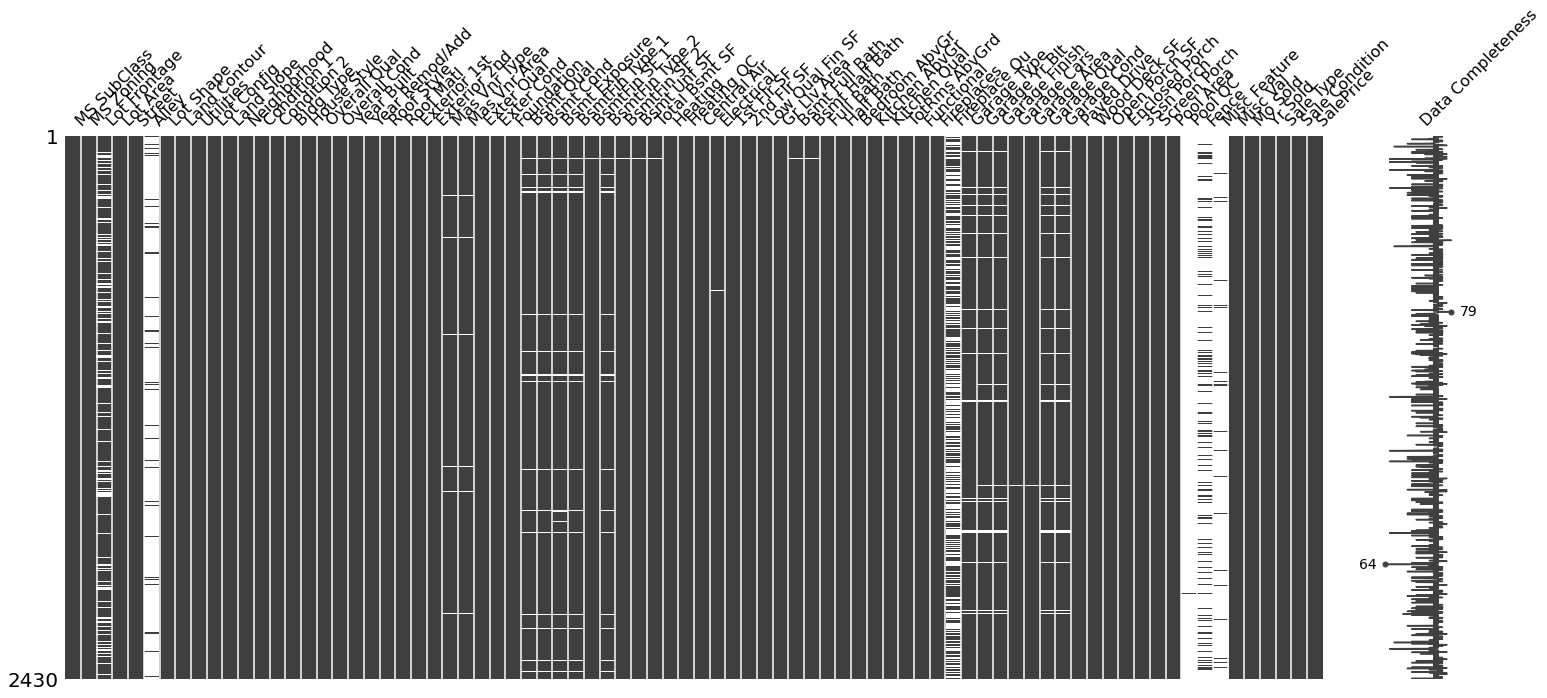

In [1465]:
import missingno as msno
# Using msno.matrix() to see more details
msno.matrix(train_df, labels=True);

I will set all NaN values to the category "missing"  fo object and 0 for numerical values to avoid  dropping 2430 rows or replacing missing values by the median or they average that could impact the accuracy of the prediction.  


In [1466]:
# Fill NaN by missing fot object 
train_df[train_df.select_dtypes(exclude="number").columns] = train_df[train_df.select_dtypes(exclude="number").columns].fillna("missing")
# Fill NaN by 0 for numerical values
train_df[train_df.select_dtypes(include="number").columns] = train_df[train_df.select_dtypes(include="number").columns].fillna(0)

- The variables are not necessarily encoded consistently. For instance, MS SubClass (the type of dwelling) and MS Zoning (zoning classification) are both categorical variables, but one is encoded with numerical values and the other with short labels.

Change MS SubClass type to ``str`` to enable the function ``pd.get_dummies`` to work in this categorical variable.

In [1467]:
# Change MS SubClass type to str 
train_df["MS SubClass"] = train_df["MS SubClass"].astype(str)

' to do drop outliers check plot '

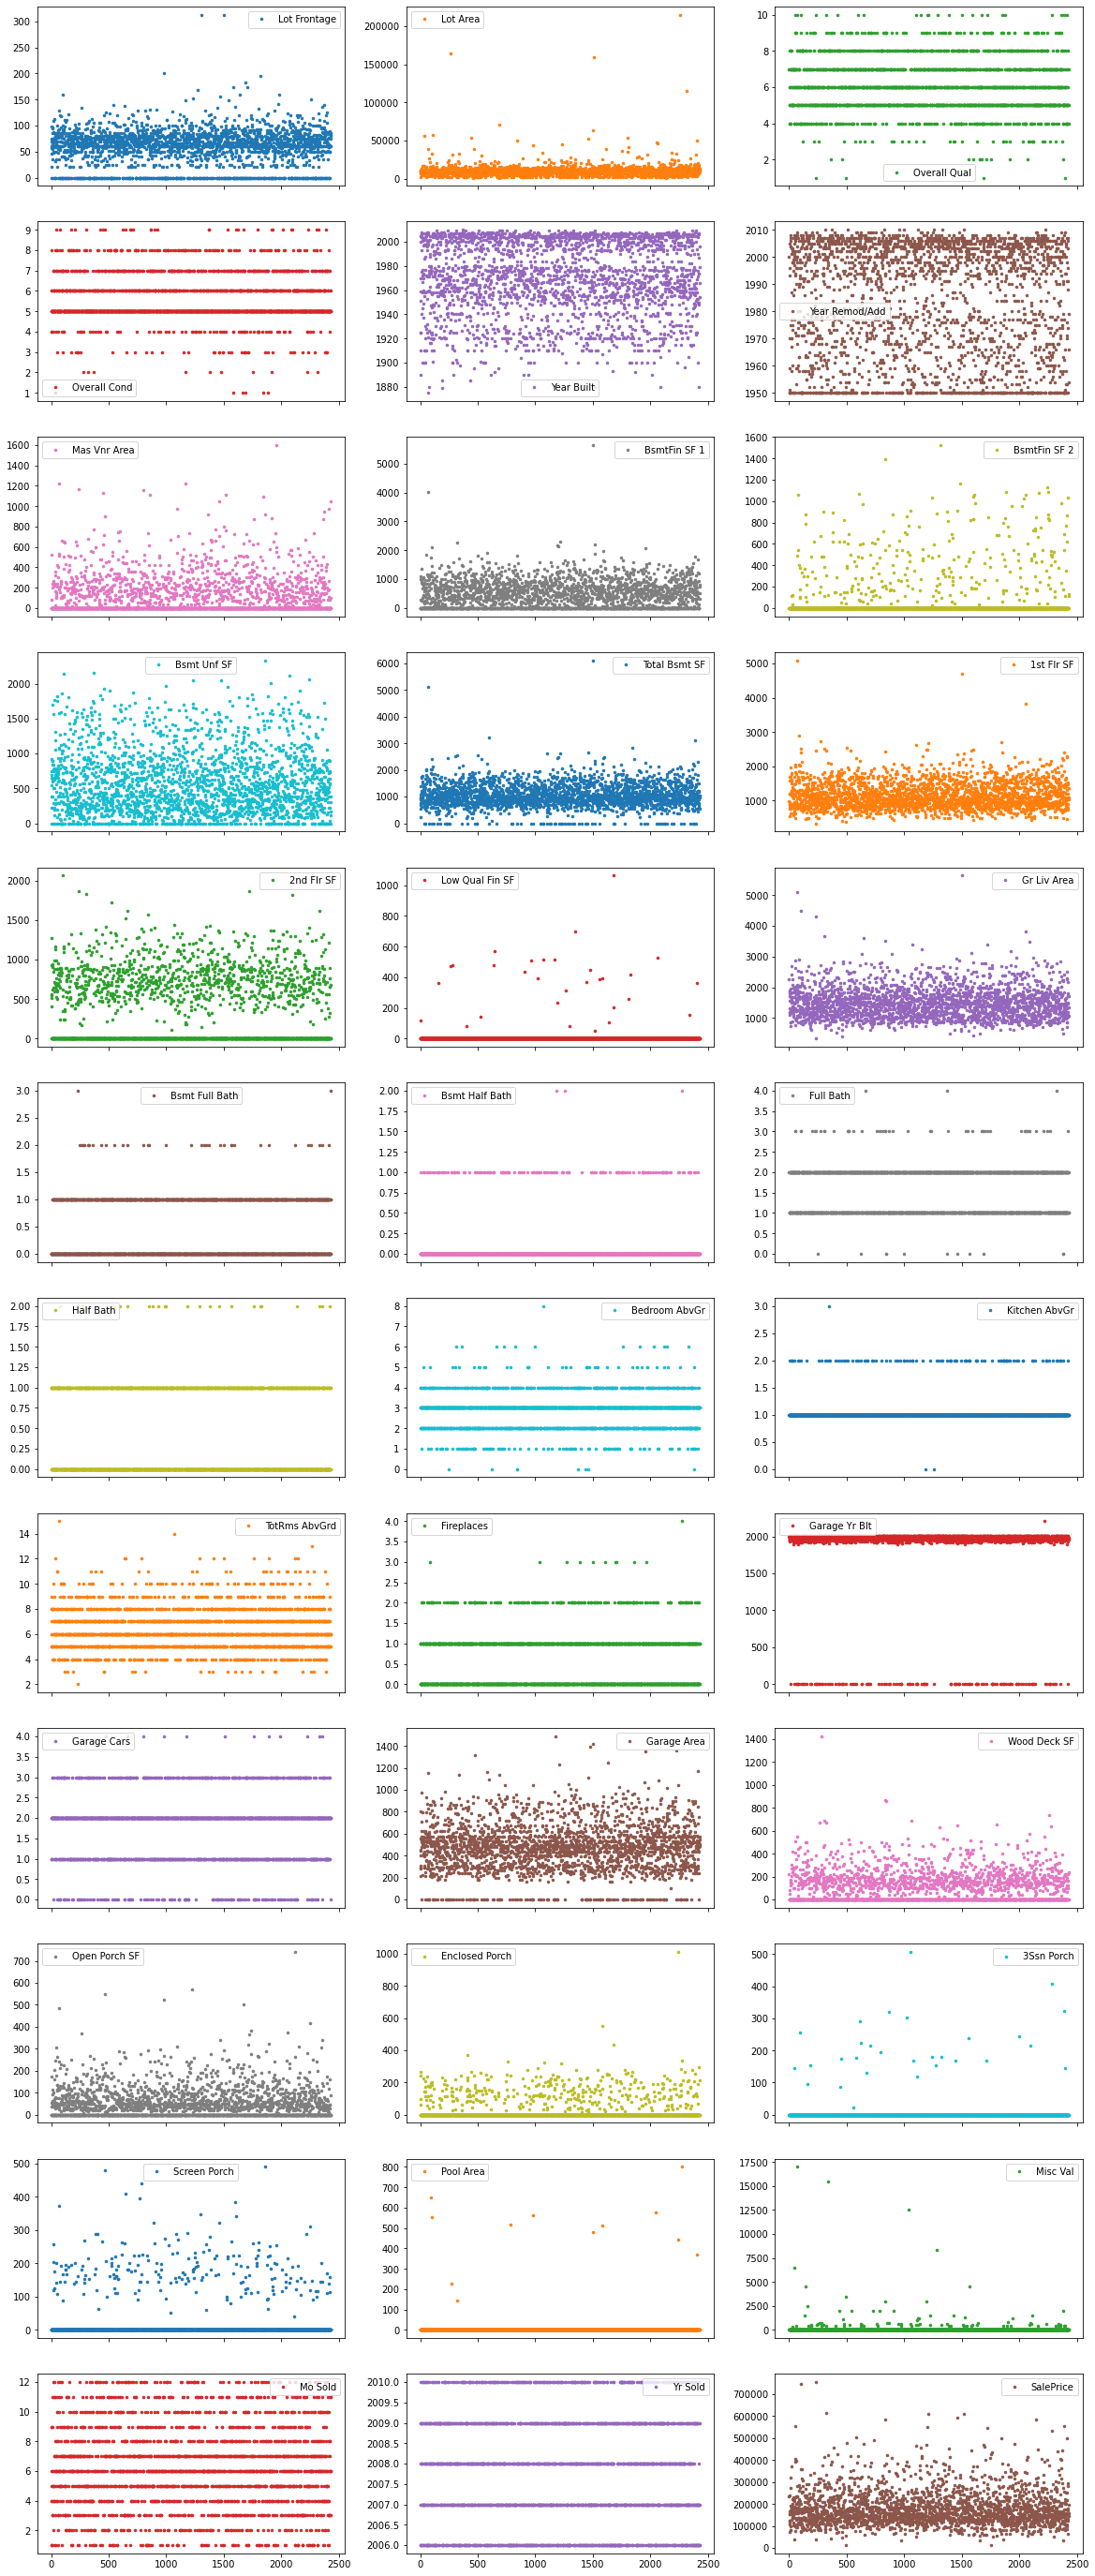

In [1468]:
""" to remove """
train_df.plot(
    subplots=True,
    marker=".",
    lw=0, 
    layout=(-1, 3),
    figsize=(20, 50),
    markersize=5,

);


""" to do drop outliers check plot """

In [1469]:
train_df["Wood Deck SF"].max()

1424

In [1470]:
# Set range 
range_values = {
    "Lot Frontage": [200, 320],
    "Lot Area": [100000, 220000],
    "BsmtFin SF 1": [3000, 6000],
    "Enclosed Porch" : [600, 1200],
    "Wood Deck SF" : [1200, 1500]
} 

# Remove outlier according to the range set
for col in range_values:
    # Get range numbers
    num = range_values.get(col)
    # locate values that are in the range
    mask = train_df[col].between(num[0], num[1])
    # Drop values outide the sepecified range
    """ to remove!!!! """
    print(mask.loc[mask].shape) 
    train_df = train_df.drop(mask.loc[mask].index)
 

print("New tarin_df without outliers shape:", train_df.shape)


(3,)
(4,)
(1,)
(1,)
(1,)
New tarin_df without outliers shape: (2420, 80)


' to do drop outliers check plot '

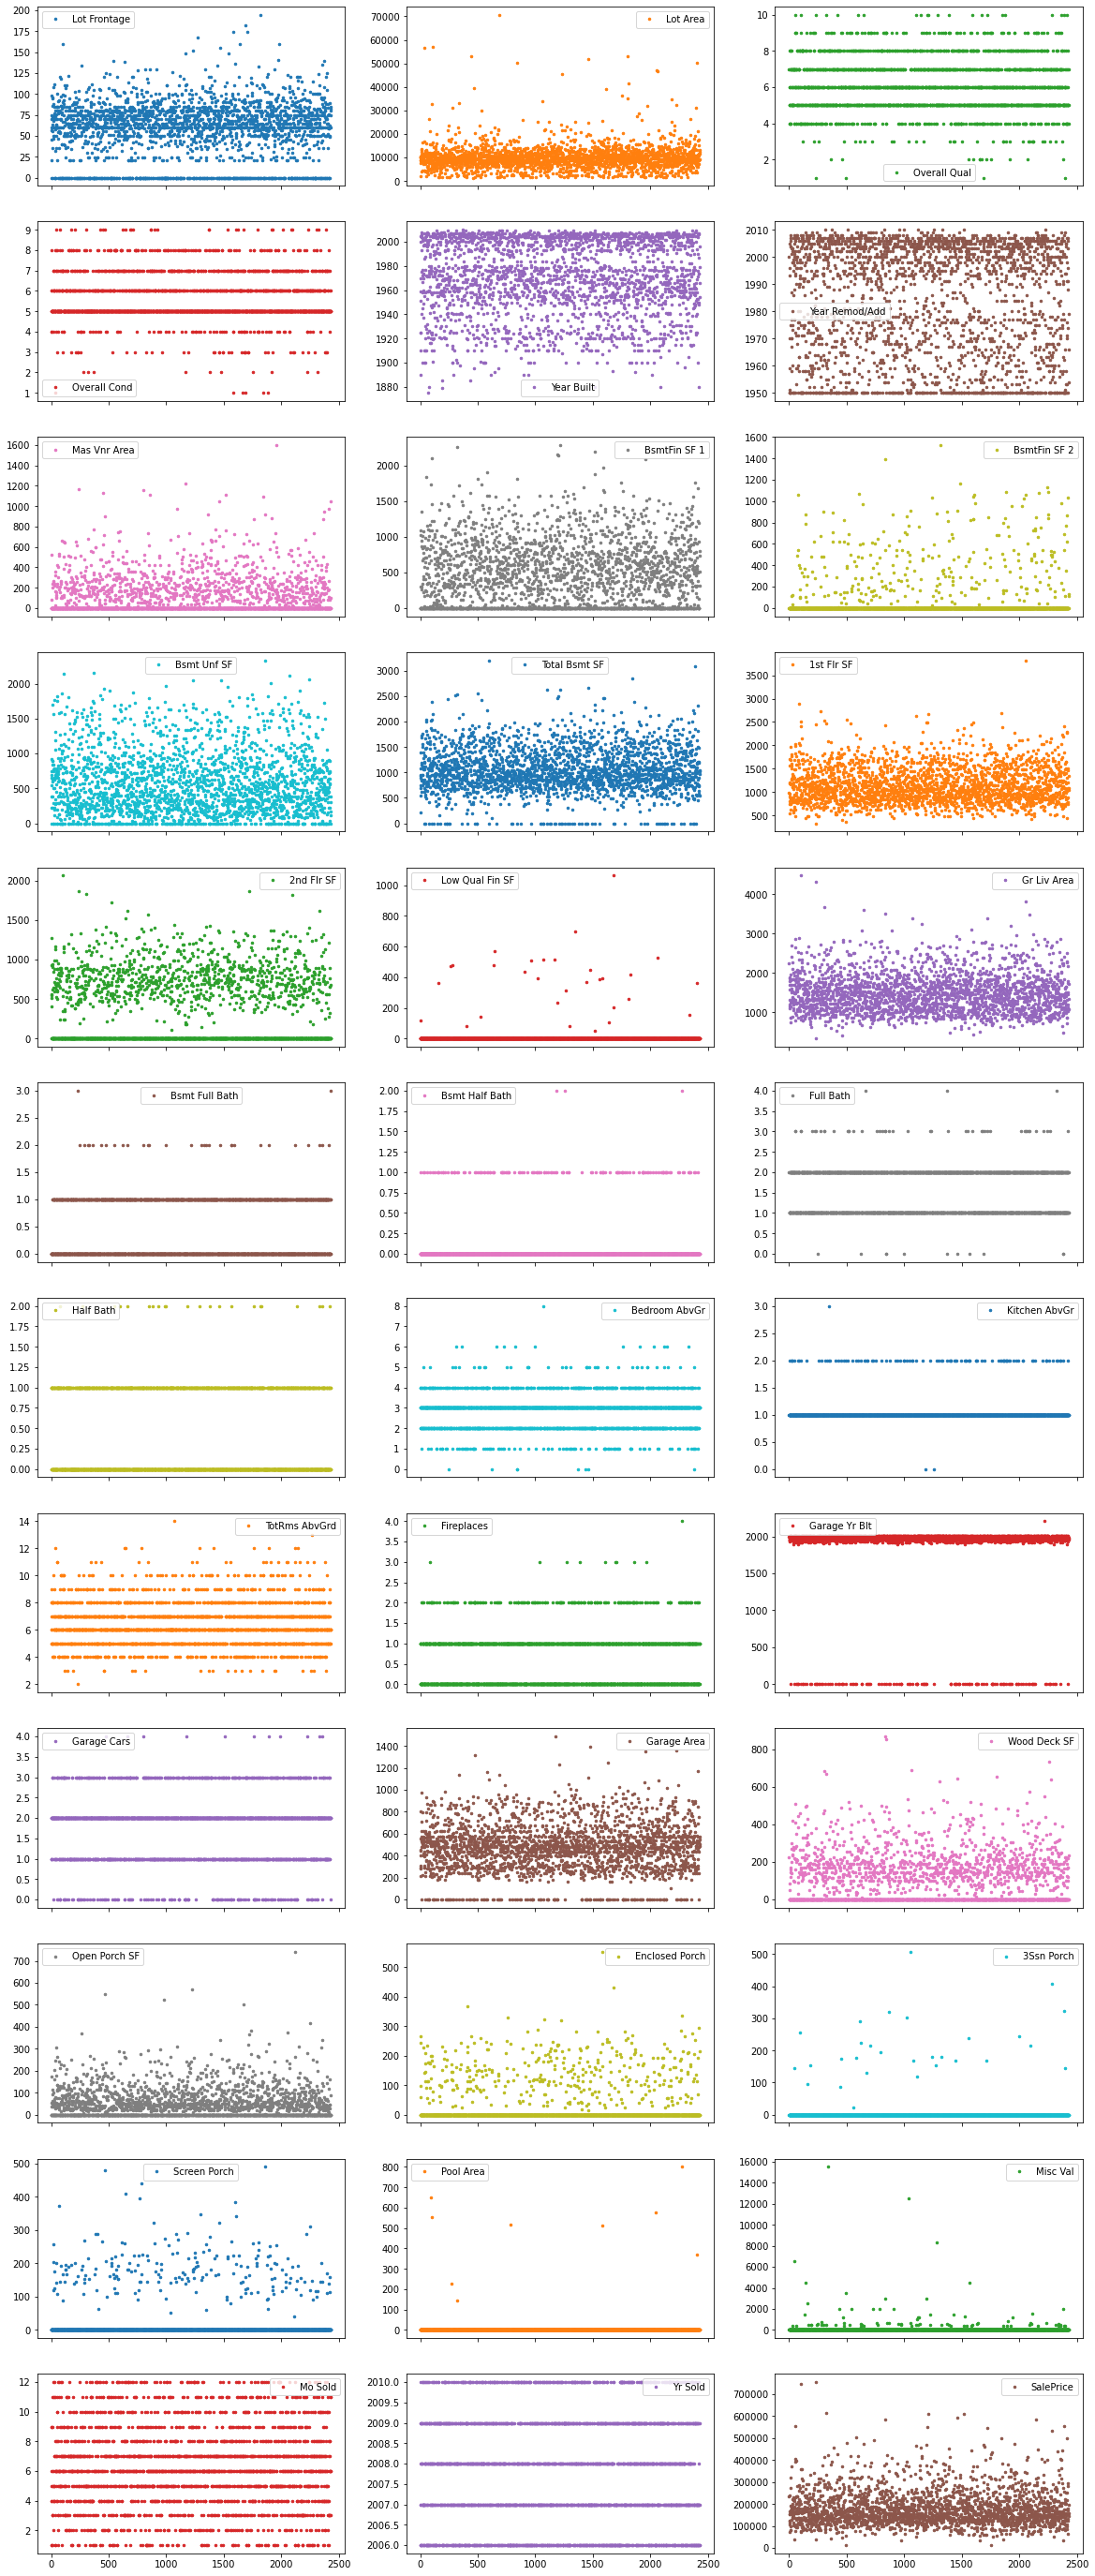

In [1471]:
""" to remove """
train_df.plot(
    subplots=True,
    marker=".",
    lw=0, 
    layout=(-1, 3),
    figsize=(20, 50),
    markersize=5,

);


""" to do drop outliers check plot """

Correcting inconsistencies in the variables by convert all the strings in a column to lowercase using the ``"str.lower()`` method:

In [1472]:
# Convert all string to lowercase
str_features = train_df.select_dtypes(exclude="number").columns

for col in str_features:
    train_df[col] = train_df[col].str.lower()

# Dispaly the change
train_df.select_dtypes(exclude="number").head()

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,60,rl,pave,missing,ir1,lvl,allpub,inside,gtl,gilbert,...,builtin,fin,ta,ta,y,missing,missing,missing,wd,normal
1,20,rl,pave,missing,reg,lvl,allpub,corner,gtl,names,...,attchd,unf,ta,ta,y,missing,missing,missing,wd,normal
2,160,rm,pave,missing,reg,lvl,allpub,inside,gtl,meadowv,...,attchd,unf,ta,ta,y,missing,missing,missing,wd,normal
3,20,rl,pave,missing,ir1,lvl,allpub,inside,gtl,names,...,attchd,rfn,ta,ta,y,missing,missing,missing,wd,normal
4,190,rm,pave,missing,ir1,bnk,allpub,inside,gtl,oldtown,...,detchd,unf,ta,ta,n,missing,mnprv,missing,wd,normal


In [1473]:
""" to remove """

' to remove '

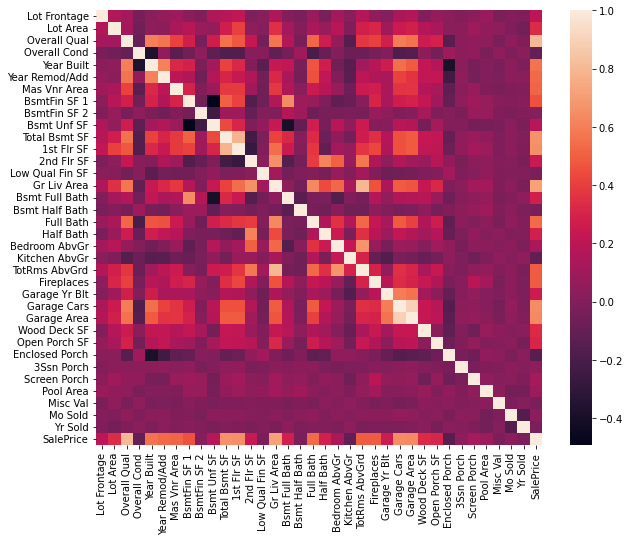

In [1474]:
import seaborn as sns
corr_matrix = train_df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.show()


In [1475]:
features = train_df.drop(["SalePrice","1st Flr SF", "Total Bsmt SF"], axis=1).select_dtypes(include="number").columns

# Create input matrix with the additional column of ones
X = train_df[features].values
X1 = np.c_[np.ones(X.shape[0]), X]
# Compute rank and condition number
M = X1.shape[1]  # Number of columns
rank = np.linalg.matrix_rank(X1)
cond = np.linalg.cond(X1)
print("Columns {} rank {} collinear {}".format(M, rank, M - rank))
print("Condition number:", cond)

Columns 34 rank 34 collinear 0
Condition number: 18651904.069875337


In [1476]:
def find_collinear_features(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
    return to_drop

to_drop = find_collinear_features(train_df)
print(to_drop)
""" a = train_df.drop(to_drop, axis=1) """

['TotRms AbvGrd', 'Garage Area', 'SalePrice']


' a = train_df.drop(to_drop, axis=1) '

To identify incorrect and missing values in your data, you can use various methods such as:

Check for missing values: Look for missing values in the dataset and determine if they are missing at random or if they have a pattern. If they have a pattern, you can use imputation methods to fill in the missing values. If they are missing at random, you can simply delete the rows with missing values.

Check for inconsistencies: Check for inconsistencies in the data by comparing values for the same observation across different columns. For example, you may have a column for the year a house was built and another for the year it was sold. If the year of sale is before the year of construction, you know there is an error.

Check for outliers: Look for outliers in the dataset by plotting histograms, box plots or scatter plots. Outliers can have a big impact on your model's predictions, so you may want to remove them, replace them with the median or average value, or try to understand why they exist.

Check for incorrect data types: Make sure each column in the dataset has the correct data type. For example, if a column is supposed to contain only numerical values, make sure it doesn't contain any strings or other non-numerical values.

Check for duplicates: Look for duplicate rows in the dataset and remove them if necessary.

### Feature engineering
Your analysis should also include feature engineering. Here are a few ideas

- Create indicator variables ex. year of construction is older than some threshold
- Transformations ex. log-transforms, polynomials

Suggestion: write down your feature engineering ideas during the data exploration stage.

- Indicator variables: This involves creating a new binary or categorical variable that indicates the presence or absence of some characteristic. For example, creating a binary indicator for houses that are older than a certain age.

- Transformations: This involves transforming the original features to create new, potentially more informative features. Common transformations include log-transforms, polynomials, square roots, and reciprocals. These can help improve the linearity of the relationship between the features and the target variable, making it easier for a model to learn the relationship.

- Binning: Binning involves grouping continuous variables into a smaller number of categories. This can help reduce the impact of outliers and improve the interpretability of the model.

- Interactions: This involves creating new features that are the product or sum of two or more original features. Interactions can capture non-linear relationships between features and target variables, which might be missed by a linear model.

In [1477]:
tarin_df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,old_house
0,60,rl,0.0,8795,pave,missing,ir1,lvl,allpub,inside,...,missing,missing,missing,0,4,2009,wd,normal,236000,0
1,20,rl,75.0,10170,pave,missing,reg,lvl,allpub,corner,...,missing,missing,missing,0,6,2006,wd,normal,155000,1
2,160,rm,21.0,2001,pave,missing,reg,lvl,allpub,inside,...,missing,missing,missing,0,1,2007,wd,normal,75000,1
3,20,rl,70.0,10552,pave,missing,ir1,lvl,allpub,inside,...,missing,missing,missing,0,4,2010,wd,normal,165500,1
4,190,rm,60.0,10120,pave,missing,ir1,bnk,allpub,inside,...,missing,mnprv,missing,0,1,2007,wd,normal,122000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,90,rl,60.0,10800,pave,missing,reg,lvl,allpub,inside,...,missing,missing,missing,0,3,2009,wd,alloca,179000,0
2426,20,rl,82.0,12464,pave,missing,ir2,low,allpub,corner,...,missing,gdprv,missing,0,11,2009,wd,normal,152000,0
2427,60,rl,80.0,11584,pave,missing,reg,lvl,allpub,inside,...,missing,missing,missing,0,11,2007,wd,normal,197000,0
2428,80,rl,85.0,13400,pave,missing,reg,lvl,allpub,inside,...,missing,gdwo,missing,0,6,2006,wd,normal,159950,1


In [1478]:
# Create dummy variable to represent is a house old or not
threshold = train_df["Year Built"].median()
train_df["old_house"] = (train_df["Year Built"] < threshold).astype(int)

# Drop "Year Built"
tarin_df = train_df.drop("Year Built", axis=1)



The above code creates a new column ``"old_house"`` in the DataFrame, with the values 0 or 1, depending on whether the year of construction in the ``"Year Built"`` column is older or not older than the threshold. The ``astype(int)`` method is used to convert the values to integers.

In [1479]:
""" sns.pairplot(train_df) """

' sns.pairplot(train_df) '

### Feature encoding
Your analysis should include the necessary feature encoding steps. The documentation.txt file labels each variable with its type. For categorical ones, it uses the ordinal and nominal classification.

- Ordinal variables - you can order the categories
- Nominal variables - no possible ordering of the categories

The encoding depends on the type of variable and its meaning. For instance, the kitchen quality variable is on a scale from excellent to poor. Hence, it’s an ordinal variable, and you can choose to apply one-hot encoding or define a numerical scale ex. excellent corresponds to 5 and poor to 1. In any case, justify your choices!

# to read 
Yes, that's correct! Encoding categorical variables is an important step in the data preprocessing pipeline.

For ordinal variables, you can encode the categories as numerical values that reflect the order of the categories. For example, if the kitchen quality variable has the categories "excellent", "good", "average", "fair", and "poor", you can assign numerical values to them such as 5 for "excellent", 4 for "good", 3 for "average", 2 for "fair", and 1 for "poor". This way, the encoding captures the ordinal relationship between the categories.

For nominal variables, there is no meaningful order between the categories. In this case, one-hot encoding is a common choice. One-hot encoding creates a binary column for each category and assigns a 1 or 0 to the columns based on the category of the original variable. For example, if the nominal variable has three categories "A", "B", and "C", the one-hot encoding would create three new binary columns "A", "B", and "C".

When choosing the encoding method, it's important to consider the meaning of the variable and the type of model you'll be using. For example, one-hot encoding is appropriate for nominal variables and decision tree-based models, but it can lead to sparse data and a large number of features for linear models. In such cases, a different encoding method like target encoding or ordinal encoding may be more suitable.

In summary, the choice of encoding method depends on the type of variable and its meaning, as well as the type of model you'll be using. Justifying your choices is important to ensure that your encoding is meaningful and suitable for your analysis.

In [1480]:
# One-hot encode
train_df = pd.get_dummies(train_df, drop_first=True)

Splitting data
---
You should split the data into training and validation sets (e.g. 60-40 split). You will use the training set for fitting the models and the validation set for evaluating the models and tuning hyperparameters.

In [1481]:
X = train_df.drop("SalePrice", axis=1)
y = train_df.SalePrice

# Spliting data
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.4, random_state=0)


# Compute baseline
baseline = y_val - np.median(y_val) 
""" not sure of the formala to check!!!!! """


' not sure of the formala to check!!!!! '

In [1489]:
X_tr.iloc[:, :20]

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr
1496,50.0,7030,4,6,1925,1950,0.0,0.0,0.0,641.0,641.0,641,0,0,641,0.0,0.0,1,0,2
2192,0.0,11885,8,5,2001,2001,108.0,990.0,0.0,309.0,1299.0,1299,573,0,1872,1.0,0.0,2,1,3
1952,21.0,1526,4,8,1970,2002,0.0,515.0,0.0,115.0,630.0,630,0,0,630,1.0,0.0,1,0,1
414,60.0,6324,4,6,1927,1950,0.0,0.0,0.0,520.0,520.0,520,0,0,520,0.0,0.0,1,0,1
2251,0.0,14585,6,6,1960,1987,85.0,594.0,219.0,331.0,1144.0,1429,0,0,1429,0.0,1.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3
1738,119.0,10895,5,6,1955,1955,0.0,648.0,0.0,324.0,972.0,972,0,0,972,0.0,0.0,1,0,3
766,0.0,4538,9,5,2001,2001,179.0,1004.0,0.0,306.0,1310.0,1310,0,0,1310,1.0,0.0,1,1,1
838,114.0,17242,9,5,1993,1994,738.0,292.0,1393.0,48.0,1733.0,1933,1567,0,3500,1.0,0.0,3,1,4


In [1492]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.utils import resample

# Randomly sample the data of size 20
""" sample_index = np.random.choice(X_tr.shape[0], size=20, replace=False)
x_sample = X_tr[sample_index, :]
y_sample = y_tr[sample_index] """

# Setup each regression
pipe_lr =  Pipeline([("scaler",StandardScaler()), ("lr", LinearRegression())])
ridge = Pipeline([("scaler",StandardScaler()), ("ridge", LinearRegression())])
pipe_lr2 = Pipeline([("scaler",StandardScaler()), ("coef", PolynomialFeatures()), ("lr", LinearRegression())])

# Fit 
pipe_lr.fit(X_tr, y_tr)
# taking a simple of first 20 features
ridge.fit(X_tr.iloc[:, :20], y_tr)
pipe_lr2.fit(X_tr, y_tr)

# Display the results
print("MAE for linear regression without ouliers: {:.3f}".format(MAE(y_val, pipe_lr.predict(X_val))))
print("MAE for Ridge regression without ouliers: {:.3f}".format(MAE(y_val, ridge.predict(X_val.iloc[:, :20]))))
print("MAE for linear regression with ouliers: {:.3f}".format(MAE(y_val, pipe_lr2.predict(X_val))))

MAE for linear regression without ouliers: 101972840032807.125
MAE for Ridge regression without ouliers: 20290.485
MAE for linear regression with ouliers: 23940.863


In [ ]:
# check code for random selection

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# check code belowe

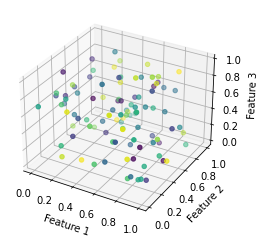

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
X = np.random.rand(100, 3)
y = np.random.rand(100)

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()

In [ ]:
288/5

57.6

In [ ]:
y_tr.shape

(1452,)